# Классификатор Xception Network, реализованный на Keras и Tensorflow и обученный на датасете Cats and Dogs.
Может отличать фотографии с кошками от фотографий с собаками.

Несколько ячеек ниже: для скачивания и распаковки датасета в Colab в окружении на основе Linux.

Эти же ячейки можно выполнить на Windows, если необходимые утилиты (rm, ls, curl, unzip и пр.) будут установлены с помощью [Cygwin](https://cygwin.com/install.html).

Либо можно скачать и распаковать датасет [Cats and Dogs](https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip) на один уровень с ноутбуком.

In [ ]:
# Очищаем workspace от сохранённых обученных моделей от предыдущих запусков.
#!rm -rf xception_network_cats_and_dogs_checkpoints/
#!rm -rf xception_network_cats_and_dogs/

In [ ]:
# Очищаем workspace от скачанного файла от предыдущих запусков.
#!rm -f kagglecatsanddogs_3367a.zip

In [ ]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   137M      0  0:00:05  0:00:05 --:--:--  146M


In [ ]:
# Очищаем workspace от распакованного датасета.
!rm -rf PetImages/

In [ ]:
!unzip kagglecatsanddogs_3367a.zip 'PetImages/**/*'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: PetImages/Dog/55.jpg    
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImag

In [ ]:
!ls

drive  kagglecatsanddogs_3367a.zip  PetImages  sample_data


In [ ]:
!ls PetImages/Cat

0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
1001.jpg
10010.jpg
10011.jpg
10012.jpg
10013.jpg
10014.jpg
10015.jpg
10016.jpg
10017.jpg
10018.jpg
1002.jpg
10020.jpg
10021.jpg
10022.jpg
10023.jpg
10024.jpg
10025.jpg
10026.jpg
10027.jpg
10028.jpg
10029.jpg
1003.jpg
10030.jpg
10031.jpg
10032.jpg
10033.jpg
10034.jpg
10035.jpg
10038.jpg
10039.jpg
1004.jpg
10040.jpg
10041.jpg
10042.jpg
10043.jpg
10044.jpg
10045.jpg
10046.jpg
10047.jpg
10048.jpg
10049.jpg
1005.jpg
10050.jpg
10051.jpg
10052.jpg
10053.jpg
10054.jpg
10055.jpg
10056.jpg
10057.jpg
10058.jpg
10059.jpg
1006.jpg
10060.jpg
10061.jpg
10062.jpg
10063.jpg
10064.jpg
10065.jpg
10066.jpg
10067.jpg
10068.jpg
10069.jpg
1007.jpg
10071.jpg
10072.jpg
10074.jpg
10075.jpg
10076.jpg
10078.jpg
10079.jpg
1008.jpg
10080.jpg
10081.jpg
10082.jpg
10083.jpg
10084.jpg
10085.jpg
10086.jpg
10087.jpg
10088.jpg
10089.jpg
1009.jpg
10090.jpg
10091.jpg
10092.jpg
10093.jpg
100

11384.jpg
11385.jpg
11386.jpg
11387.jpg
11388.jpg
11389.jpg
1139.jpg
11390.jpg
11391.jpg
11392.jpg
11393.jpg
11394.jpg
11395.jpg
11396.jpg
11398.jpg
11399.jpg
114.jpg
1140.jpg
11401.jpg
11402.jpg
11403.jpg
11404.jpg
11405.jpg
11406.jpg
11407.jpg
11408.jpg
11409.jpg
1141.jpg
11411.jpg
11412.jpg
11413.jpg
11414.jpg
11415.jpg
11416.jpg
11417.jpg
11418.jpg
11419.jpg
1142.jpg
11420.jpg
11421.jpg
11422.jpg
11423.jpg
11424.jpg
11425.jpg
11426.jpg
11427.jpg
11428.jpg
11429.jpg
1143.jpg
11430.jpg
11431.jpg
11432.jpg
11433.jpg
11434.jpg
11435.jpg
11436.jpg
11437.jpg
11438.jpg
11439.jpg
11440.jpg
11442.jpg
11443.jpg
11444.jpg
11445.jpg
11446.jpg
11447.jpg
11448.jpg
11449.jpg
1145.jpg
11450.jpg
11451.jpg
11452.jpg
11454.jpg
11455.jpg
11456.jpg
11457.jpg
11458.jpg
11459.jpg
1146.jpg
11460.jpg
11461.jpg
11462.jpg
11463.jpg
11464.jpg
11465.jpg
11466.jpg
11467.jpg
11468.jpg
11469.jpg
1147.jpg
11470.jpg
11471.jpg
11472.jpg
11473.jpg
11474.jpg
11475.jpg
11476.jpg
11477.jpg
11478.jpg
11479.jpg
1148.jpg
1

1459.jpg
146.jpg
1460.jpg
1461.jpg
1462.jpg
1463.jpg
1464.jpg
1465.jpg
1466.jpg
1467.jpg
1468.jpg
1469.jpg
1470.jpg
1471.jpg
1472.jpg
1473.jpg
1474.jpg
1475.jpg
1476.jpg
1477.jpg
1478.jpg
1479.jpg
148.jpg
1480.jpg
1481.jpg
1482.jpg
1483.jpg
1484.jpg
1485.jpg
1486.jpg
1487.jpg
1488.jpg
1489.jpg
149.jpg
1490.jpg
1491.jpg
1492.jpg
1493.jpg
1494.jpg
1495.jpg
1496.jpg
1497.jpg
1498.jpg
1499.jpg
15.jpg
150.jpg
1500.jpg
1501.jpg
1502.jpg
1503.jpg
1504.jpg
1505.jpg
1506.jpg
1507.jpg
1508.jpg
1509.jpg
151.jpg
1510.jpg
1511.jpg
1512.jpg
1513.jpg
1514.jpg
1515.jpg
1516.jpg
1517.jpg
1518.jpg
1519.jpg
152.jpg
1520.jpg
1521.jpg
1522.jpg
1523.jpg
1524.jpg
1525.jpg
1526.jpg
1527.jpg
1528.jpg
1529.jpg
153.jpg
1530.jpg
1531.jpg
1532.jpg
1533.jpg
1535.jpg
1536.jpg
1537.jpg
1538.jpg
1539.jpg
154.jpg
1540.jpg
1541.jpg
1542.jpg
1543.jpg
1544.jpg
1545.jpg
1546.jpg
1548.jpg
1549.jpg
155.jpg
1550.jpg
1551.jpg
1552.jpg
1553.jpg
1554.jpg
1555.jpg
1556.jpg
1557.jpg
1558.jpg
1559.jpg
156.jpg
1560.jpg
1561.jpg
1562

2897.jpg
2898.jpg
2899.jpg
29.jpg
290.jpg
2900.jpg
2901.jpg
2902.jpg
2903.jpg
2904.jpg
2906.jpg
2907.jpg
2908.jpg
2909.jpg
291.jpg
2910.jpg
2911.jpg
2912.jpg
2913.jpg
2914.jpg
2915.jpg
2916.jpg
2917.jpg
2918.jpg
2919.jpg
292.jpg
2920.jpg
2921.jpg
2923.jpg
2924.jpg
2925.jpg
2927.jpg
2928.jpg
2929.jpg
293.jpg
2930.jpg
2931.jpg
2932.jpg
2933.jpg
2934.jpg
2935.jpg
2936.jpg
2937.jpg
2938.jpg
2939.jpg
294.jpg
2940.jpg
2941.jpg
2942.jpg
2943.jpg
2944.jpg
2945.jpg
2946.jpg
2947.jpg
2948.jpg
2949.jpg
295.jpg
2950.jpg
2951.jpg
2952.jpg
2953.jpg
2954.jpg
2955.jpg
2956.jpg
2957.jpg
2958.jpg
2959.jpg
296.jpg
2960.jpg
2961.jpg
2962.jpg
2963.jpg
2964.jpg
2965.jpg
2966.jpg
2967.jpg
2968.jpg
2969.jpg
297.jpg
2970.jpg
2971.jpg
2972.jpg
2973.jpg
2974.jpg
2975.jpg
2976.jpg
2977.jpg
2978.jpg
2979.jpg
298.jpg
2980.jpg
2981.jpg
2982.jpg
2983.jpg
2984.jpg
2985.jpg
2986.jpg
2987.jpg
2988.jpg
2989.jpg
2990.jpg
2991.jpg
2992.jpg
2993.jpg
2994.jpg
2996.jpg
2997.jpg
2998.jpg
2999.jpg
3.jpg
30.jpg
300.jpg
3000.jpg


4478.jpg
4479.jpg
448.jpg
4480.jpg
4481.jpg
4482.jpg
4483.jpg
4484.jpg
4485.jpg
4486.jpg
4487.jpg
4488.jpg
4489.jpg
449.jpg
4490.jpg
4491.jpg
4492.jpg
4493.jpg
4494.jpg
4495.jpg
4496.jpg
4497.jpg
4498.jpg
4499.jpg
45.jpg
450.jpg
4500.jpg
4501.jpg
4502.jpg
4503.jpg
4504.jpg
4506.jpg
4507.jpg
4508.jpg
4509.jpg
451.jpg
4510.jpg
4511.jpg
4512.jpg
4513.jpg
4514.jpg
4515.jpg
4516.jpg
4517.jpg
4518.jpg
452.jpg
4520.jpg
4521.jpg
4522.jpg
4523.jpg
4524.jpg
4525.jpg
4526.jpg
4527.jpg
4528.jpg
4529.jpg
453.jpg
4530.jpg
4532.jpg
4533.jpg
4534.jpg
4535.jpg
4536.jpg
4537.jpg
4538.jpg
4539.jpg
454.jpg
4540.jpg
4541.jpg
4542.jpg
4543.jpg
4544.jpg
4545.jpg
4546.jpg
4547.jpg
4548.jpg
4549.jpg
455.jpg
4550.jpg
4551.jpg
4552.jpg
4553.jpg
4554.jpg
4555.jpg
4556.jpg
4557.jpg
4558.jpg
4559.jpg
456.jpg
4560.jpg
4561.jpg
4562.jpg
4563.jpg
4564.jpg
4565.jpg
4566.jpg
4567.jpg
4568.jpg
4569.jpg
457.jpg
4570.jpg
4571.jpg
4573.jpg
4574.jpg
4575.jpg
4576.jpg
4577.jpg
4579.jpg
458.jpg
4580.jpg
4581.jpg
4582.jpg
4583.

5700.jpg
5701.jpg
5702.jpg
5703.jpg
5704.jpg
5705.jpg
5706.jpg
5707.jpg
5708.jpg
5709.jpg
571.jpg
5710.jpg
5711.jpg
5712.jpg
5713.jpg
5714.jpg
5715.jpg
5716.jpg
5717.jpg
5718.jpg
5719.jpg
572.jpg
5720.jpg
5721.jpg
5723.jpg
5724.jpg
5725.jpg
5726.jpg
5727.jpg
5728.jpg
5729.jpg
573.jpg
5730.jpg
5731.jpg
5732.jpg
5733.jpg
5734.jpg
5735.jpg
5736.jpg
5738.jpg
5739.jpg
574.jpg
5740.jpg
5741.jpg
5742.jpg
5743.jpg
5744.jpg
5745.jpg
5746.jpg
5747.jpg
5748.jpg
5749.jpg
575.jpg
5750.jpg
5751.jpg
5752.jpg
5753.jpg
5754.jpg
5755.jpg
5756.jpg
5757.jpg
5758.jpg
5759.jpg
576.jpg
5760.jpg
5761.jpg
5762.jpg
5763.jpg
5764.jpg
5765.jpg
5766.jpg
5767.jpg
5768.jpg
5769.jpg
577.jpg
5770.jpg
5771.jpg
5773.jpg
5774.jpg
5775.jpg
5776.jpg
5777.jpg
5778.jpg
5779.jpg
578.jpg
5780.jpg
5781.jpg
5782.jpg
5783.jpg
5785.jpg
5786.jpg
5787.jpg
5788.jpg
5789.jpg
579.jpg
5790.jpg
5791.jpg
5793.jpg
5794.jpg
5795.jpg
5796.jpg
5797.jpg
5798.jpg
5799.jpg
58.jpg
580.jpg
5800.jpg
5801.jpg
5802.jpg
5803.jpg
5804.jpg
5805.jpg
5806

7074.jpg
7075.jpg
7076.jpg
7077.jpg
7078.jpg
7079.jpg
708.jpg
7080.jpg
7081.jpg
7082.jpg
7083.jpg
7084.jpg
7085.jpg
7086.jpg
7087.jpg
7088.jpg
7089.jpg
709.jpg
7090.jpg
7091.jpg
7092.jpg
7093.jpg
7094.jpg
7095.jpg
7096.jpg
7097.jpg
7098.jpg
7099.jpg
71.jpg
710.jpg
7100.jpg
7101.jpg
7102.jpg
7103.jpg
7104.jpg
7105.jpg
7106.jpg
7107.jpg
7108.jpg
7109.jpg
711.jpg
7110.jpg
7111.jpg
7112.jpg
7113.jpg
7114.jpg
7115.jpg
7116.jpg
7117.jpg
7118.jpg
7119.jpg
712.jpg
7120.jpg
7121.jpg
7122.jpg
7123.jpg
7124.jpg
7126.jpg
7127.jpg
7128.jpg
7129.jpg
713.jpg
7130.jpg
7131.jpg
7132.jpg
7133.jpg
7134.jpg
7135.jpg
7136.jpg
7137.jpg
7138.jpg
7139.jpg
714.jpg
7140.jpg
7141.jpg
7142.jpg
7143.jpg
7144.jpg
7145.jpg
7146.jpg
7147.jpg
7148.jpg
7149.jpg
715.jpg
7150.jpg
7151.jpg
7152.jpg
7153.jpg
7154.jpg
7155.jpg
7156.jpg
7157.jpg
7158.jpg
7159.jpg
716.jpg
7160.jpg
7161.jpg
7163.jpg
7164.jpg
7165.jpg
7166.jpg
7167.jpg
7168.jpg
7169.jpg
717.jpg
7170.jpg
7171.jpg
7172.jpg
7173.jpg
7174.jpg
7175.jpg
7176.jpg
7177

8098.jpg
8099.jpg
81.jpg
810.jpg
8100.jpg
8101.jpg
8102.jpg
8103.jpg
8104.jpg
8105.jpg
8106.jpg
8107.jpg
8108.jpg
811.jpg
8110.jpg
8111.jpg
8112.jpg
8113.jpg
8114.jpg
8116.jpg
8117.jpg
8118.jpg
8119.jpg
812.jpg
8120.jpg
8121.jpg
8122.jpg
8123.jpg
8124.jpg
8125.jpg
8126.jpg
8127.jpg
8129.jpg
813.jpg
8130.jpg
8131.jpg
8132.jpg
8133.jpg
8134.jpg
8135.jpg
8136.jpg
8137.jpg
8138.jpg
8139.jpg
814.jpg
8140.jpg
8141.jpg
8142.jpg
8143.jpg
8144.jpg
8145.jpg
8146.jpg
8147.jpg
8148.jpg
8149.jpg
815.jpg
8150.jpg
8151.jpg
8152.jpg
8153.jpg
8154.jpg
8155.jpg
8156.jpg
8157.jpg
8158.jpg
8159.jpg
816.jpg
8160.jpg
8161.jpg
8162.jpg
8163.jpg
8164.jpg
8165.jpg
8166.jpg
8167.jpg
8168.jpg
8169.jpg
817.jpg
8170.jpg
8171.jpg
8172.jpg
8174.jpg
8175.jpg
8176.jpg
8177.jpg
8178.jpg
8179.jpg
818.jpg
8180.jpg
8181.jpg
8182.jpg
8184.jpg
8185.jpg
8186.jpg
8187.jpg
8188.jpg
8189.jpg
819.jpg
8190.jpg
8191.jpg
8192.jpg
8193.jpg
8194.jpg
8195.jpg
8196.jpg
8197.jpg
8198.jpg
8199.jpg
82.jpg
820.jpg
8200.jpg
8202.jpg
8203.jp

9181.jpg
9182.jpg
9183.jpg
9184.jpg
9185.jpg
9186.jpg
9187.jpg
9188.jpg
9189.jpg
919.jpg
9191.jpg
9192.jpg
9193.jpg
9194.jpg
9195.jpg
9198.jpg
9199.jpg
92.jpg
920.jpg
9200.jpg
9201.jpg
9202.jpg
9203.jpg
9204.jpg
9205.jpg
9206.jpg
9207.jpg
9209.jpg
921.jpg
9211.jpg
9212.jpg
9215.jpg
9216.jpg
9217.jpg
9218.jpg
9219.jpg
922.jpg
9220.jpg
9221.jpg
9222.jpg
9223.jpg
9224.jpg
9225.jpg
9226.jpg
9227.jpg
9228.jpg
9229.jpg
923.jpg
9230.jpg
9231.jpg
9232.jpg
9233.jpg
9234.jpg
9235.jpg
9236.jpg
9238.jpg
9239.jpg
924.jpg
9240.jpg
9241.jpg
9242.jpg
9243.jpg
9244.jpg
9245.jpg
9246.jpg
9247.jpg
9248.jpg
9249.jpg
925.jpg
9250.jpg
9251.jpg
9252.jpg
9253.jpg
9254.jpg
9255.jpg
9256.jpg
9257.jpg
9258.jpg
9259.jpg
926.jpg
9260.jpg
9262.jpg
9263.jpg
9264.jpg
9265.jpg
9266.jpg
9267.jpg
9268.jpg
9269.jpg
927.jpg
9270.jpg
9271.jpg
9272.jpg
9273.jpg
9274.jpg
9275.jpg
9276.jpg
9277.jpg
9278.jpg
9279.jpg
928.jpg
9280.jpg
9281.jpg
9282.jpg
9284.jpg
9285.jpg
9286.jpg
9287.jpg
9288.jpg
9289.jpg
929.jpg
9290.jpg
9291.

In [ ]:
!ls PetImages/Dog

0.jpg
1.jpg
100.jpg
1000.jpg
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
1001.jpg
10010.jpg
10011.jpg
10012.jpg
10013.jpg
10014.jpg
10015.jpg
10016.jpg
10017.jpg
10018.jpg
10019.jpg
1002.jpg
10020.jpg
10021.jpg
10022.jpg
10024.jpg
10025.jpg
10026.jpg
10027.jpg
10028.jpg
10029.jpg
1003.jpg
10030.jpg
10031.jpg
10032.jpg
10033.jpg
10034.jpg
10035.jpg
10036.jpg
10037.jpg
10038.jpg
10039.jpg
1004.jpg
10040.jpg
10041.jpg
10042.jpg
10044.jpg
10045.jpg
10046.jpg
10047.jpg
10048.jpg
10049.jpg
1005.jpg
10050.jpg
10051.jpg
10052.jpg
10053.jpg
10054.jpg
10055.jpg
10056.jpg
10057.jpg
10058.jpg
10059.jpg
1006.jpg
10060.jpg
10061.jpg
10062.jpg
10063.jpg
10064.jpg
10065.jpg
10066.jpg
10067.jpg
10068.jpg
10069.jpg
1007.jpg
10070.jpg
10071.jpg
10072.jpg
10073.jpg
10074.jpg
10075.jpg
10076.jpg
10077.jpg
10078.jpg
10079.jpg
1008.jpg
10080.jpg
10082.jpg
10083.jpg
10084.jpg
10085.jpg
10086.jpg
10087.jpg
10088.jpg
10089.jpg
1009.jpg
10090.jpg
10091.jpg


11377.jpg
11379.jpg
1138.jpg
11380.jpg
11381.jpg
11383.jpg
11384.jpg
11385.jpg
11386.jpg
11388.jpg
1139.jpg
11390.jpg
11391.jpg
11392.jpg
11393.jpg
11394.jpg
11395.jpg
11396.jpg
11397.jpg
11398.jpg
11399.jpg
114.jpg
1140.jpg
11400.jpg
11401.jpg
11402.jpg
11403.jpg
11404.jpg
11405.jpg
11407.jpg
11408.jpg
11409.jpg
1141.jpg
11411.jpg
11412.jpg
11414.jpg
11415.jpg
11416.jpg
11417.jpg
11418.jpg
11419.jpg
1142.jpg
11420.jpg
11421.jpg
11422.jpg
11423.jpg
11424.jpg
11425.jpg
11426.jpg
11427.jpg
11428.jpg
1143.jpg
11430.jpg
11431.jpg
11432.jpg
11434.jpg
11435.jpg
11436.jpg
11437.jpg
11438.jpg
11439.jpg
1144.jpg
11440.jpg
11441.jpg
11442.jpg
11443.jpg
11444.jpg
11445.jpg
11446.jpg
11447.jpg
11448.jpg
11449.jpg
1145.jpg
11450.jpg
11451.jpg
11452.jpg
11453.jpg
11454.jpg
11455.jpg
11456.jpg
11457.jpg
11458.jpg
11459.jpg
1146.jpg
11460.jpg
11461.jpg
11462.jpg
11463.jpg
11464.jpg
11465.jpg
11466.jpg
11467.jpg
11468.jpg
11469.jpg
1147.jpg
11470.jpg
11471.jpg
11472.jpg
11473.jpg
11474.jpg
11475.jpg
11

151.jpg
1510.jpg
1511.jpg
1513.jpg
1514.jpg
1515.jpg
1516.jpg
1517.jpg
1518.jpg
1519.jpg
152.jpg
1520.jpg
1521.jpg
1522.jpg
1523.jpg
1524.jpg
1525.jpg
1526.jpg
1527.jpg
1528.jpg
1529.jpg
153.jpg
1530.jpg
1532.jpg
1533.jpg
1534.jpg
1535.jpg
1536.jpg
1537.jpg
1538.jpg
1539.jpg
154.jpg
1540.jpg
1541.jpg
1542.jpg
1543.jpg
1544.jpg
1545.jpg
1546.jpg
1548.jpg
1549.jpg
155.jpg
1550.jpg
1552.jpg
1553.jpg
1554.jpg
1555.jpg
1556.jpg
1557.jpg
1558.jpg
1559.jpg
156.jpg
1560.jpg
1561.jpg
1563.jpg
1564.jpg
1565.jpg
1566.jpg
1567.jpg
1568.jpg
1569.jpg
157.jpg
1570.jpg
1571.jpg
1572.jpg
1573.jpg
1574.jpg
1575.jpg
1576.jpg
1577.jpg
1578.jpg
158.jpg
1580.jpg
1581.jpg
1582.jpg
1583.jpg
1584.jpg
1585.jpg
1586.jpg
1587.jpg
1588.jpg
1589.jpg
159.jpg
1590.jpg
1591.jpg
1592.jpg
1593.jpg
1594.jpg
1595.jpg
1596.jpg
1597.jpg
1598.jpg
1599.jpg
16.jpg
160.jpg
1600.jpg
1601.jpg
1602.jpg
1603.jpg
1604.jpg
1605.jpg
1606.jpg
1608.jpg
1609.jpg
161.jpg
1610.jpg
1611.jpg
1612.jpg
1613.jpg
1614.jpg
1615.jpg
1616.jpg
1617.

2863.jpg
2864.jpg
2865.jpg
2866.jpg
2867.jpg
2868.jpg
2869.jpg
287.jpg
2870.jpg
2871.jpg
2872.jpg
2873.jpg
2874.jpg
2875.jpg
2876.jpg
2878.jpg
2879.jpg
288.jpg
2880.jpg
2881.jpg
2882.jpg
2883.jpg
2884.jpg
2885.jpg
2886.jpg
2887.jpg
2888.jpg
2889.jpg
289.jpg
2890.jpg
2891.jpg
2892.jpg
2893.jpg
2894.jpg
2895.jpg
2896.jpg
2897.jpg
2898.jpg
2899.jpg
29.jpg
290.jpg
2900.jpg
2901.jpg
2902.jpg
2903.jpg
2904.jpg
2906.jpg
2907.jpg
2909.jpg
291.jpg
2910.jpg
2911.jpg
2912.jpg
2913.jpg
2914.jpg
2916.jpg
2917.jpg
2918.jpg
2919.jpg
292.jpg
2920.jpg
2921.jpg
2922.jpg
2923.jpg
2924.jpg
2925.jpg
2926.jpg
2927.jpg
2928.jpg
2929.jpg
293.jpg
2930.jpg
2931.jpg
2932.jpg
2933.jpg
2934.jpg
2935.jpg
2936.jpg
2937.jpg
2938.jpg
2939.jpg
294.jpg
2940.jpg
2941.jpg
2942.jpg
2943.jpg
2945.jpg
2946.jpg
2947.jpg
2948.jpg
2949.jpg
295.jpg
2950.jpg
2951.jpg
2952.jpg
2953.jpg
2954.jpg
2956.jpg
2957.jpg
2958.jpg
2959.jpg
2960.jpg
2961.jpg
2962.jpg
2964.jpg
2965.jpg
2966.jpg
2967.jpg
2968.jpg
2969.jpg
297.jpg
2971.jpg
2972

3832.jpg
3833.jpg
3834.jpg
3835.jpg
3836.jpg
3838.jpg
3839.jpg
384.jpg
3840.jpg
3841.jpg
3842.jpg
3843.jpg
3844.jpg
3845.jpg
3846.jpg
3847.jpg
3848.jpg
385.jpg
3850.jpg
3853.jpg
3854.jpg
3855.jpg
3856.jpg
3857.jpg
3858.jpg
3859.jpg
386.jpg
3860.jpg
3861.jpg
3862.jpg
3863.jpg
3864.jpg
3865.jpg
3866.jpg
3867.jpg
3868.jpg
3869.jpg
387.jpg
3870.jpg
3871.jpg
3872.jpg
3873.jpg
3874.jpg
3875.jpg
3876.jpg
3877.jpg
3878.jpg
3879.jpg
388.jpg
3880.jpg
3881.jpg
3882.jpg
3883.jpg
3884.jpg
3886.jpg
3887.jpg
3888.jpg
3889.jpg
389.jpg
3890.jpg
3891.jpg
3892.jpg
3893.jpg
3894.jpg
3895.jpg
3896.jpg
3897.jpg
3898.jpg
3899.jpg
39.jpg
390.jpg
3900.jpg
3901.jpg
3902.jpg
3903.jpg
3904.jpg
3905.jpg
3906.jpg
3907.jpg
3908.jpg
3909.jpg
391.jpg
3910.jpg
3911.jpg
3912.jpg
3913.jpg
3914.jpg
3915.jpg
3916.jpg
3917.jpg
3918.jpg
3919.jpg
392.jpg
3920.jpg
3921.jpg
3922.jpg
3923.jpg
3924.jpg
3926.jpg
3928.jpg
3929.jpg
393.jpg
3931.jpg
3932.jpg
3933.jpg
3934.jpg
3935.jpg
3936.jpg
3937.jpg
3938.jpg
3939.jpg
394.jpg
3940.

5312.jpg
5313.jpg
5314.jpg
5315.jpg
5316.jpg
5317.jpg
5318.jpg
5319.jpg
532.jpg
5320.jpg
5321.jpg
5322.jpg
5323.jpg
5324.jpg
5325.jpg
5326.jpg
5327.jpg
5328.jpg
5329.jpg
533.jpg
5330.jpg
5331.jpg
5333.jpg
5334.jpg
5336.jpg
5338.jpg
5339.jpg
534.jpg
5340.jpg
5341.jpg
5342.jpg
5344.jpg
5345.jpg
5346.jpg
5347.jpg
5349.jpg
535.jpg
5350.jpg
5351.jpg
5352.jpg
5353.jpg
5354.jpg
5355.jpg
5356.jpg
5357.jpg
5358.jpg
5359.jpg
536.jpg
5360.jpg
5361.jpg
5362.jpg
5363.jpg
5364.jpg
5365.jpg
5366.jpg
5367.jpg
5368.jpg
5369.jpg
537.jpg
5370.jpg
5371.jpg
5372.jpg
5373.jpg
5374.jpg
5375.jpg
5376.jpg
5377.jpg
5378.jpg
5379.jpg
538.jpg
5380.jpg
5381.jpg
5382.jpg
5383.jpg
5384.jpg
5385.jpg
5386.jpg
5387.jpg
5389.jpg
539.jpg
5392.jpg
5393.jpg
5395.jpg
5396.jpg
5397.jpg
5398.jpg
5399.jpg
54.jpg
540.jpg
5401.jpg
5403.jpg
5404.jpg
5405.jpg
5406.jpg
5407.jpg
5408.jpg
5409.jpg
541.jpg
5411.jpg
5412.jpg
5413.jpg
5414.jpg
5415.jpg
5416.jpg
5417.jpg
5418.jpg
5419.jpg
542.jpg
5420.jpg
5421.jpg
5422.jpg
5423.jpg
5424.

6657.jpg
6658.jpg
666.jpg
6660.jpg
6661.jpg
6662.jpg
6663.jpg
6664.jpg
6665.jpg
6666.jpg
6667.jpg
6668.jpg
6669.jpg
667.jpg
6670.jpg
6671.jpg
6672.jpg
6673.jpg
6674.jpg
6675.jpg
6676.jpg
6677.jpg
6678.jpg
6679.jpg
668.jpg
6680.jpg
6681.jpg
6682.jpg
6683.jpg
6685.jpg
6686.jpg
6687.jpg
6688.jpg
6689.jpg
669.jpg
6690.jpg
6691.jpg
6692.jpg
6693.jpg
6694.jpg
6695.jpg
6696.jpg
6697.jpg
6698.jpg
6699.jpg
67.jpg
670.jpg
6700.jpg
6701.jpg
6702.jpg
6703.jpg
6704.jpg
6705.jpg
6706.jpg
6708.jpg
6709.jpg
671.jpg
6710.jpg
6711.jpg
6712.jpg
6713.jpg
6715.jpg
6716.jpg
6717.jpg
6719.jpg
672.jpg
6720.jpg
6722.jpg
6723.jpg
6724.jpg
6725.jpg
6726.jpg
6727.jpg
6728.jpg
6729.jpg
673.jpg
6730.jpg
6731.jpg
6732.jpg
6733.jpg
6734.jpg
6735.jpg
6736.jpg
6737.jpg
6738.jpg
6739.jpg
674.jpg
6740.jpg
6741.jpg
6743.jpg
6744.jpg
6745.jpg
6746.jpg
6747.jpg
6748.jpg
6749.jpg
675.jpg
6750.jpg
6751.jpg
6752.jpg
6753.jpg
6754.jpg
6755.jpg
6756.jpg
6757.jpg
6758.jpg
6759.jpg
676.jpg
6760.jpg
6761.jpg
6762.jpg
6763.jpg
6764.

7874.jpg
7875.jpg
7876.jpg
7877.jpg
7878.jpg
7879.jpg
788.jpg
7880.jpg
7881.jpg
7882.jpg
7885.jpg
7886.jpg
7887.jpg
7888.jpg
7889.jpg
789.jpg
7890.jpg
7891.jpg
7892.jpg
7893.jpg
7895.jpg
7896.jpg
7897.jpg
7898.jpg
7899.jpg
79.jpg
790.jpg
7900.jpg
7902.jpg
7903.jpg
7904.jpg
7905.jpg
7906.jpg
7907.jpg
7909.jpg
791.jpg
7910.jpg
7911.jpg
7912.jpg
7913.jpg
7914.jpg
7915.jpg
7916.jpg
7917.jpg
7918.jpg
7919.jpg
792.jpg
7920.jpg
7921.jpg
7922.jpg
7923.jpg
7924.jpg
7925.jpg
7926.jpg
7927.jpg
7928.jpg
7929.jpg
793.jpg
7930.jpg
7931.jpg
7933.jpg
7934.jpg
7935.jpg
7936.jpg
7937.jpg
7938.jpg
7939.jpg
794.jpg
7940.jpg
7942.jpg
7943.jpg
7944.jpg
7945.jpg
7946.jpg
7947.jpg
7948.jpg
7949.jpg
795.jpg
7950.jpg
7951.jpg
7952.jpg
7953.jpg
7954.jpg
7955.jpg
7956.jpg
7957.jpg
7958.jpg
7959.jpg
796.jpg
7960.jpg
7961.jpg
7962.jpg
7963.jpg
7964.jpg
7965.jpg
7966.jpg
7967.jpg
7968.jpg
797.jpg
7970.jpg
7971.jpg
7972.jpg
7973.jpg
7974.jpg
7975.jpg
7976.jpg
7977.jpg
7978.jpg
7979.jpg
7980.jpg
7981.jpg
7982.jpg
7983

9240.jpg
9241.jpg
9242.jpg
9244.jpg
9245.jpg
9246.jpg
9247.jpg
9248.jpg
9249.jpg
9250.jpg
9251.jpg
9252.jpg
9253.jpg
9254.jpg
9255.jpg
9256.jpg
9257.jpg
9258.jpg
926.jpg
9261.jpg
9262.jpg
9263.jpg
9264.jpg
9265.jpg
9267.jpg
9268.jpg
9269.jpg
927.jpg
9270.jpg
9271.jpg
9272.jpg
9273.jpg
9274.jpg
9275.jpg
9276.jpg
9277.jpg
9278.jpg
9279.jpg
928.jpg
9280.jpg
9281.jpg
9282.jpg
9284.jpg
9285.jpg
9286.jpg
9287.jpg
9288.jpg
9289.jpg
929.jpg
9290.jpg
9292.jpg
9293.jpg
9294.jpg
9295.jpg
9296.jpg
9297.jpg
9298.jpg
9299.jpg
93.jpg
930.jpg
9300.jpg
9301.jpg
9302.jpg
9303.jpg
9304.jpg
9305.jpg
9306.jpg
9307.jpg
9308.jpg
9309.jpg
931.jpg
9310.jpg
9311.jpg
9312.jpg
9314.jpg
9315.jpg
9316.jpg
9317.jpg
9318.jpg
9319.jpg
932.jpg
9320.jpg
9321.jpg
9322.jpg
9323.jpg
9324.jpg
9325.jpg
9326.jpg
9327.jpg
9328.jpg
9329.jpg
933.jpg
9330.jpg
9331.jpg
9332.jpg
9333.jpg
9334.jpg
9336.jpg
9337.jpg
9338.jpg
9339.jpg
934.jpg
9340.jpg
9341.jpg
9342.jpg
9343.jpg
9344.jpg
9345.jpg
9346.jpg
9347.jpg
9348.jpg
9349.jpg
935

In [ ]:
# Понадобится для работы с файлами.
import os

In [ ]:
import tensorflow as tf

In [ ]:
# Отфильтруем изображения, у которых в заголовке нет JFIF. Нам нужна информация о разрешении и соотношении сторон.
for folder_name in ("Cat", "Dog"):
  del_img_cnt = 0
  for file_name in os.listdir(f"PetImages/{folder_name}"):
    file_path = f"PetImages/{folder_name}/{file_name}"
    # Используем менеджер контекста (with) при чтении файла. Файл будет закрыт автоматически при выходе из блока кода.
    with open(file_path, "rb") as file:
      # Ищем в первых 4 байтах файла байты "JFIF" (в ASCII / UTF-8 кодах).
      has_jfif = tf.compat.as_bytes("JFIF") in file.peek(4)
      if not has_jfif:
        file.close()
        os.remove(file_path)
        del_img_cnt += 1
  print(f"Удалено {del_img_cnt} изображений из директории {folder_name}")

Удалено 759 изображений из директории Cat
Удалено 831 изображений из директории Dog


In [12]:
# Генерируем обучающую и тестовую выборки.
VALIDATION_SPLIT = 0.2
SEED = 1337
IMAGE_SIZE = (180, 180)
BATCH_SIZE = 32

# Keras понимает, что 2 класса, потому что 2 директории (Cats, Dogs).
# Автоматически будут созданы два лейбла (0 - Cat, 1 - Dog).

training_images = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split = VALIDATION_SPLIT,
    subset = "training",
    seed = SEED,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split = VALIDATION_SPLIT,
    subset = "validation",
    seed = SEED,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


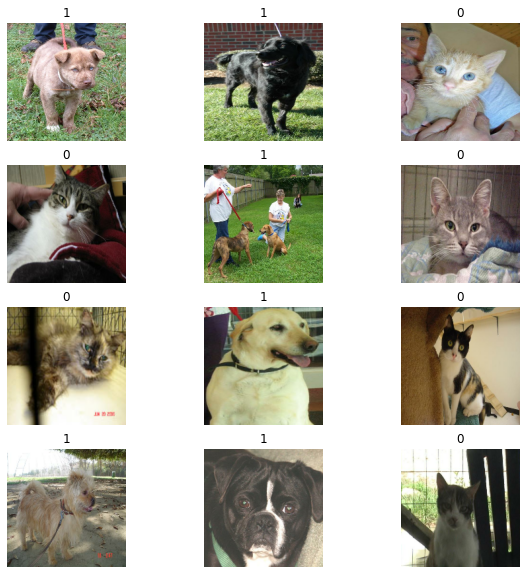

In [14]:
# Посмотрим на изображения.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_images.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [16]:
# Сделаем вспомогательную структуру для наращивания обучающей выборки.
augmentation_network = tf.keras.Sequential(
    [
        # Тоже слои, но реализуют детерминированные алгоритмы.
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

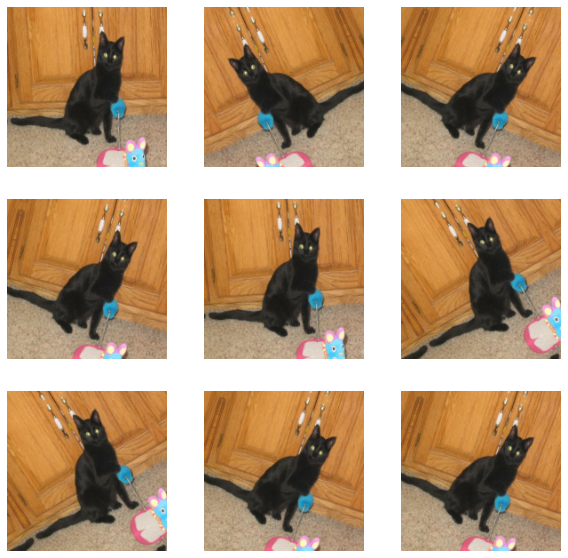

In [17]:
# Пример того, как она работает.
plt.figure(figsize=(10, 10))
for images, _ in training_images.take(1):
    for i in range(9):
        augmented_images = augmentation_network(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
# Нарастим обучающую выборку.
augmented_training_images = training_images.map(
  lambda image, label: (augmentation_network(image, training = True), label)
)

In [19]:
# Буферизируем ввод.
augmented_training_images = augmented_training_images.prefetch(buffer_size=32)
validation_images = validation_images.prefetch(buffer_size=32)

In [20]:
# Метод для создания модели Xception network.
def build_xception_network(input_shape, num_classes):
    inputs = tf.keras.Input(shape = input_shape)

    # Наращивание можно сделать частью архитектуры нейронной сети.
    #x = augmentation_network(inputs)

    x = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
    x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    previous_block_activation = x

    for size in [128, 256, 512, 728]:
        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = tf.keras.layers.add([x, residual])
        previous_block_activation = x

    x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(units, activation=activation)(x)
    return tf.keras.Model(inputs, outputs)

In [21]:
# Создаём модель.
xception_network_cats_and_dogs = build_xception_network(input_shape = IMAGE_SIZE + (3,), num_classes = 2)

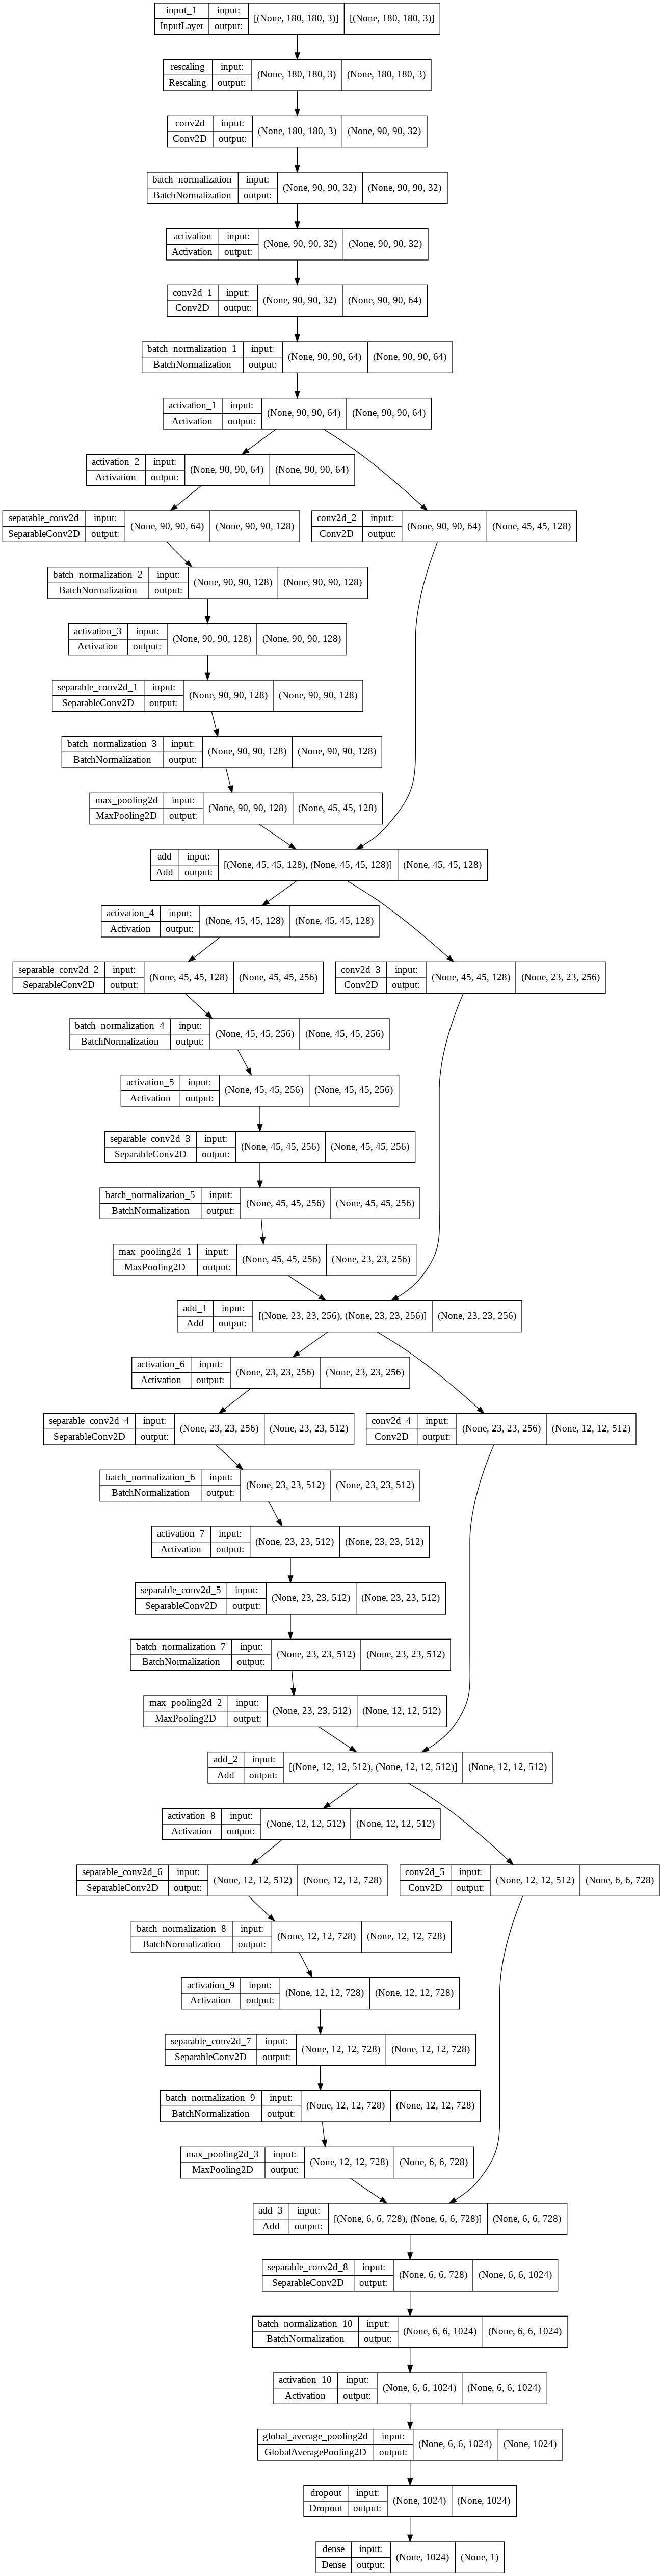

In [22]:
# Визуализируем её.
tf.keras.utils.plot_model(xception_network_cats_and_dogs, show_shapes = True)

In [23]:
# Либо обучаем нейронную сеть.
# (!) Долгий процесс.
EPOCHS = 50

# callback для сохранения результатов обучения в формате Keras (h5) после каждой эпохи обучения.
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("xception_network_cats_and_dogs_checkpoints/epoch_{epoch}.h5")
]
xception_network_cats_and_dogs.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
xception_network_cats_and_dogs.fit(
    augmented_training_images, epochs=EPOCHS, callbacks=callbacks, validation_data=validation_images
)
# Сохраняем модель целиком в формате TensorFlow (saved_model.pb + variables/).
xception_network_cats_and_dogs.save("xception_network_cats_and_dogs");

Epoch 1/50
586/586 [==============================] - 309s 502ms/step - loss: 0.6209 - accuracy: 0.6686 - val_loss: 1.4324 - val_accuracy: 0.5107
Epoch 2/50
196/586 [=========>....................] - ETA: 3:04 - loss: 0.5132 - accuracy: 0.7486

KeyboardInterrupt: ignored

In [ ]:
# Либо загружаем весовые коэффециенты от заранее обученной модели в формате Keras (h5).
xception_network_cats_and_dogs.load_weights('xception_network_cats_and_dogs_checkpoints/epoch_50.h5')

In [25]:
# Либо загружаем заранее обученную модель целиком из формата TensorFlow (saved_model.pb + variables/).
xception_network_cats_and_dogs = tf.keras.models.load_model("drive/MyDrive/2_classification_keras_cats_and_dogs/xception_network_cats_and_dogs")

[[0.0928074]]
Score: [0.0928074]
С вероятностью 90.72 процентов на картинке изображена кошка, с вероятностью 9.28 процентов - собака.


(-0.5, 179.5, 179.5, -0.5)

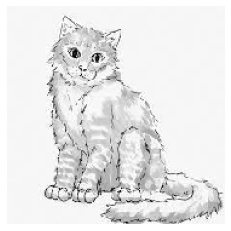

In [37]:
img = tf.keras.preprocessing.image.load_img(
    "cat-drawing.jpg", target_size=IMAGE_SIZE
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = xception_network_cats_and_dogs.predict(img_array)
print(predictions)
score = predictions[0]
print(f"Score: {score}")
print(
    "С вероятностью %.2f процентов на картинке изображена кошка, с вероятностью %.2f процентов - собака."
    % (100 * (1 - score), 100 * score)
)

plt.imshow(img)
plt.axis("off")

Домашнее задание:
* Попробуем подключить TPU (запросить в Colab среду выполнения с TPU и добавить после импорта TensorFlow инициализацию распределённой конфигурации):
```
# Создаём TPU cluster resolver.
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
# С его помощью подключиться к кластеру.
tf.config.experimental_connect_to_cluster(resolver)
# Инициализировать TPU.
tf.tpu.experimental.initialize_tpu_system(resolver)
# Смотрим в конфигурации TensorFlow, есть ли среди доступных логических устройств TPU.
print("Доступные логические устройства: ", tf.config.list_logical_devices())
```
Попробуем обучить нейронную сеть и посмотреть, насколько быстрее она обучается.